# What is OME-NGFF & Zarr

[OME-NGFF is a next generation file format for expanding bioimaging data-access strategies](
https://www.nature.com/articles/s41592-021-01326-w).

OME-NGFF 
* contains metadata stored in a human-readable form (in hidden JSON files `.z*`) and binary data.
* is based on the HDF5 conceptual model.

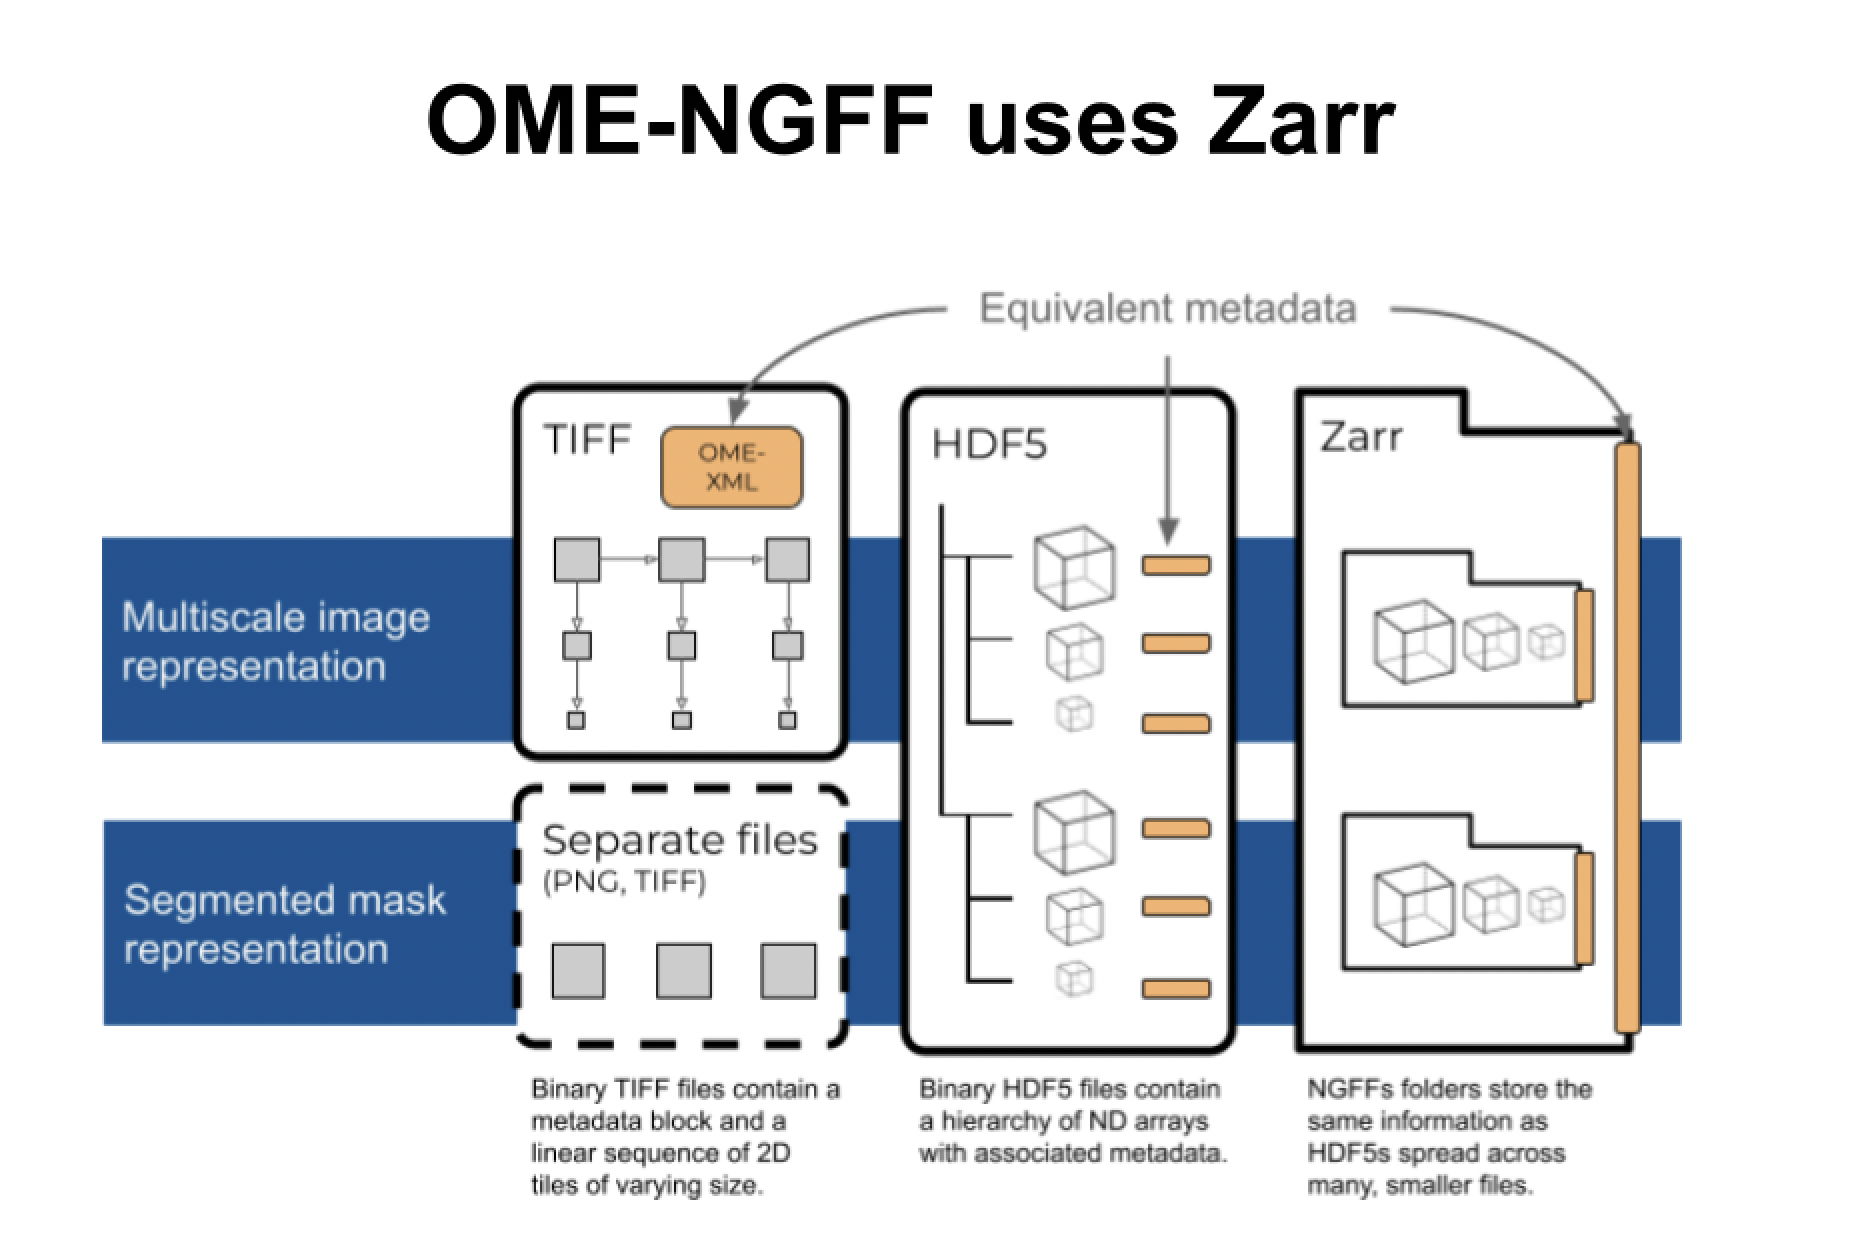 

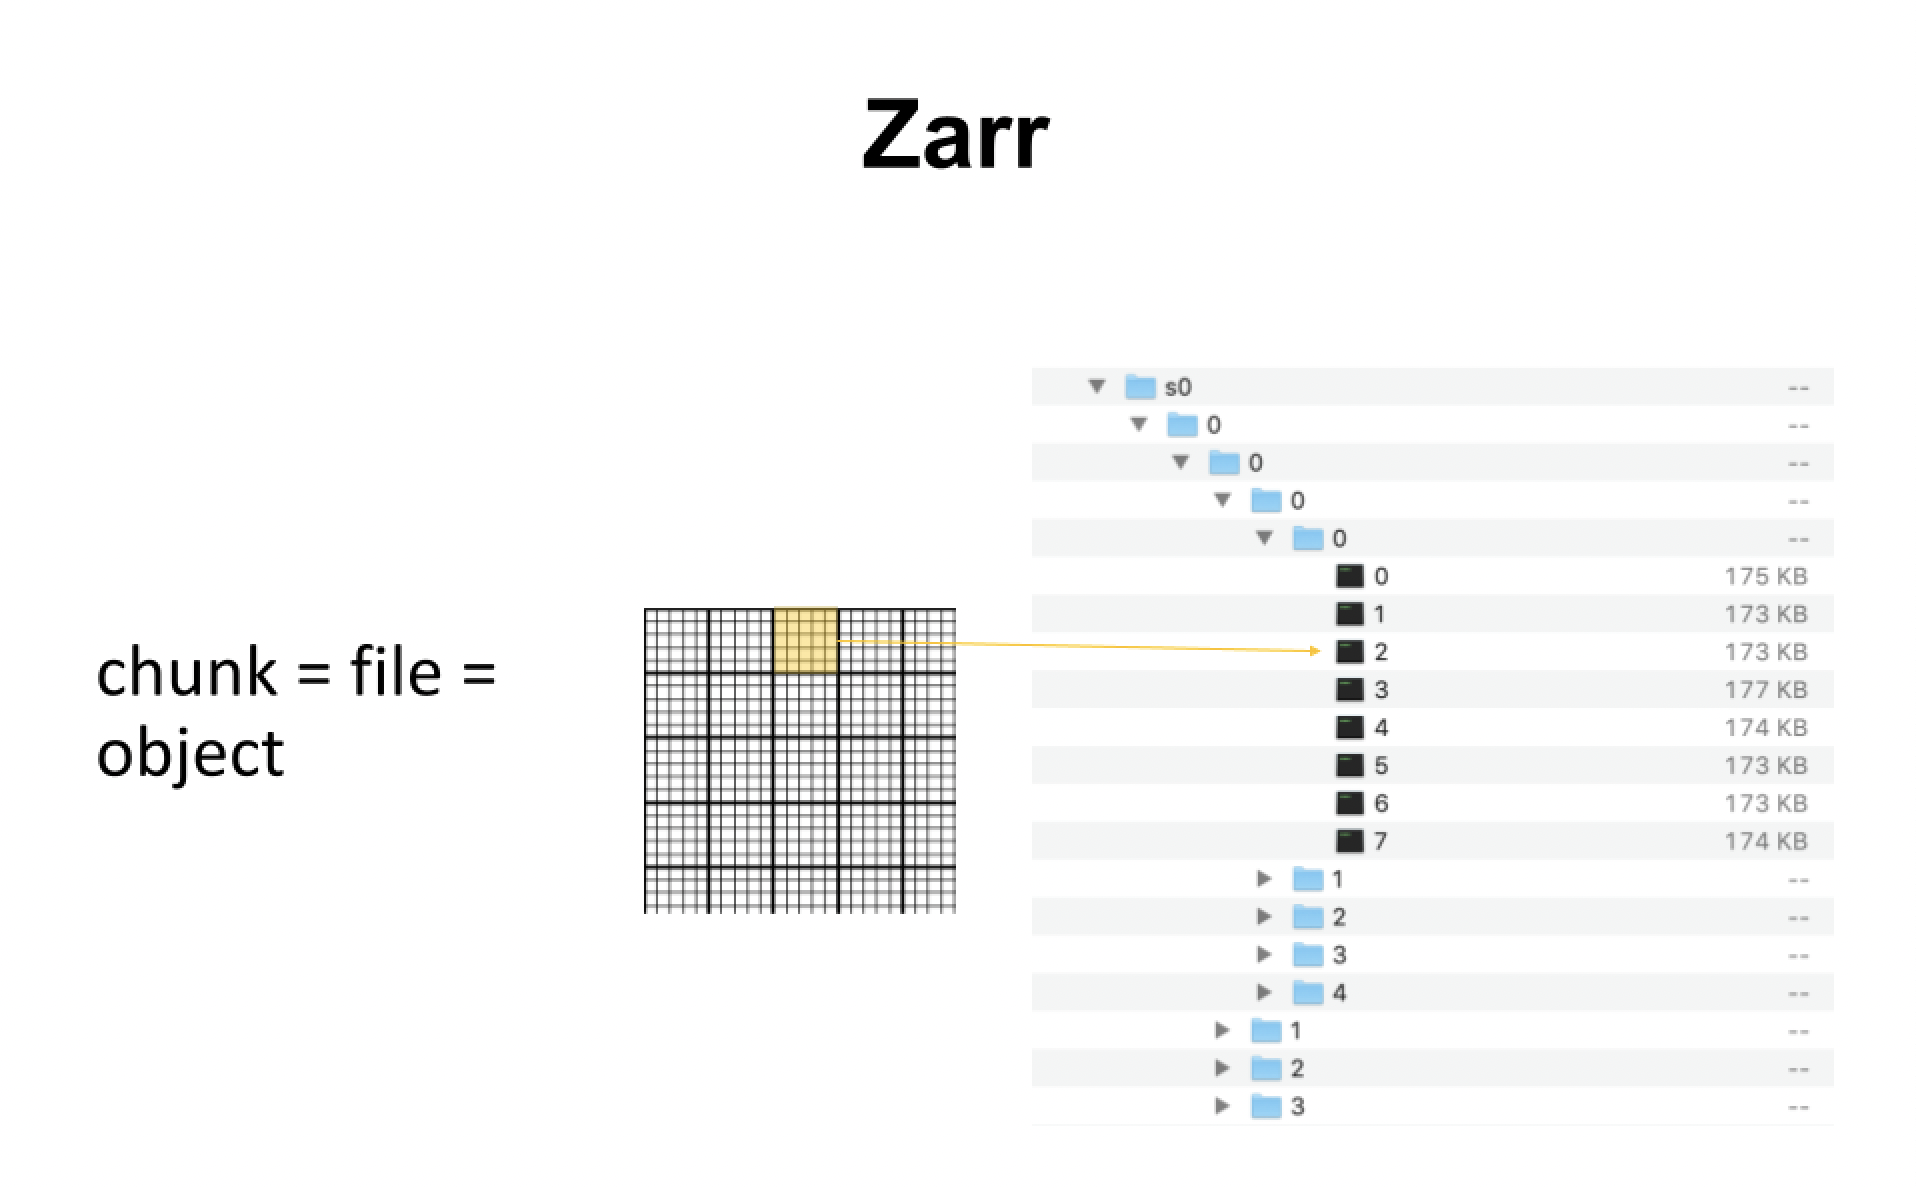

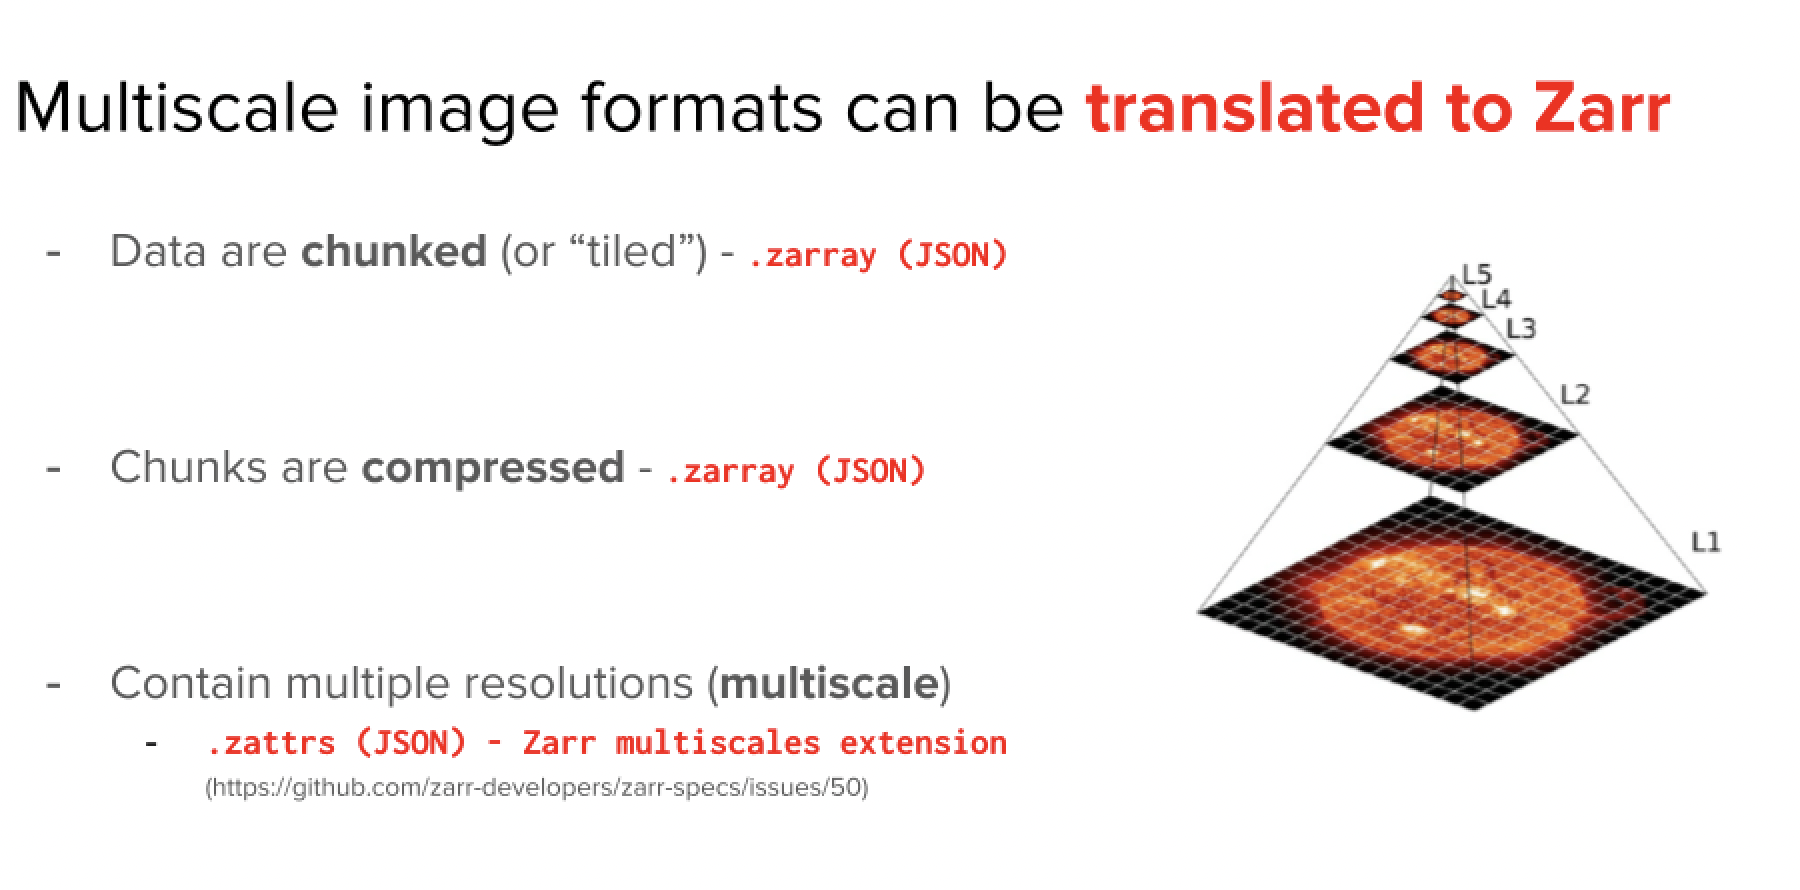

## Storage 

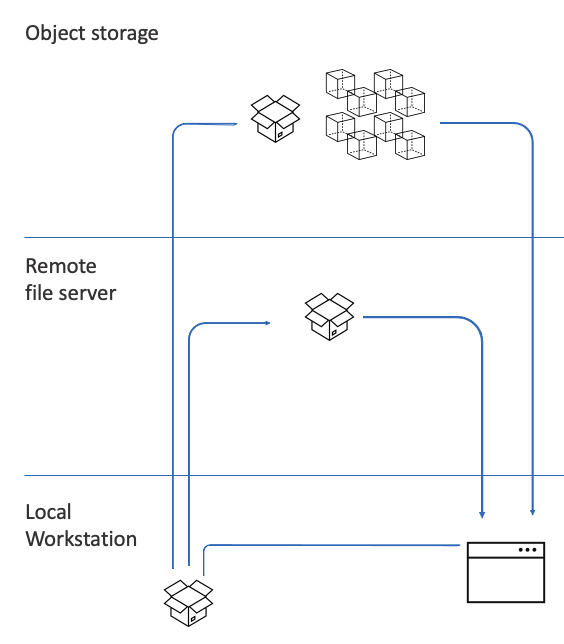

## Points to keep in mind

* The simplicity and transparency of Zarr files make them ideal for exploration and for working on the cloud.
* A downside of it can be that working with many small files can introduce bottlenecks for uploading (and even deleting).
* Working with Object store is very different from a file system, fewer (GUI) tools exist, and each Object store implementation may be slightly different.

## View data
* [View data in Napari (Python)](https://www.napari-hub.org/plugins/napari-ome-zarr)
* [View data in Fiji (Java)](https://omero-guides.readthedocs.io/en/latest/fiji/docs/view_mobie_zarr.html)
* [View in Vizarr (JS)](https://github.com/hms-dbmi/vizarr)


## Public data

Some files from [BioImage Archive](https://www.ebi.ac.uk/bioimage-archive/) and the [Image Data Resource](https://idr.openmicroscopy.org/) have been converted into OME-NGFF. The links below allow to access and view those files.

* https://uk1s3.embassy.ebi.ac.uk/bia-zarr-test/bia_examples.html
* https://www.openmicroscopy.org/2020/11/04/zarr-data.html

## Useful links

* [Zarr community](https://zarr.dev/)
* [NGFF specification](https://ngff.openmicroscopy.org/latest/)
* [Workshop on how to convert data into OME-NGFF](https://github.com/joshmoore/NGFF-GBI-2022-Workshop/blob/main/workshop.ipynb)

## How to access Zarr file on S3

We will use [dask](https://dask.org/) to access the files.

Some sofware packages required to have all the 2D planes in memory in order to work other can work on planar data. We will now show two ways to access the data depending on the needs using ``dask.array.from_zarr``.

We need to specify the ``endpoint`` and the path to the image

**Preferred way**: Get a "handle" to the data but do **not** load the binary data.

In [ ]:
def load_binary_from_s3(id, resolution='0'):
    endpoint_url = 'https://uk1s3.embassy.ebi.ac.uk/'
    root = 'idr/zarr/v0.1/%s.zarr/%s/' % (id, resolution)
    return da.from_zarr(endpoint_url + root)

**Less optimal way**: Load the binary

In [ ]:
from dask.diagnostics import ProgressBar
def load_binary_from_s3_with_data(id, resolution='0'):
    endpoint_url = 'https://uk1s3.embassy.ebi.ac.uk/'
    root = 'idr/zarr/v0.1/%s.zarr/%s/' % (id, resolution)
    with ProgressBar():
        return numpy.asarray(da.from_zarr(endpoint_url + root))

## Example

Let's now have a closer look at data using the first approach [Multi resolution Zarr image from public S3](zarr_public_s3_multiscale.ipynb).

Find some exercises below in this notebook. The solutions are available in a separate [notebook](Solutions_1_Zarr.ipynb).

# Exercises

## Load data from S3 and segment 2D-plane in parallel

Let's now try to combine the various elements together.
For that, we will use images taken from  the paper *In Toto Imaging and Reconstruction of Post-Implantation Mouse Development at the Single-Cell Level* published October 2018 in Cell: https://doi.org/10.1016/j.cell.2018.09.031. The images can be viewed online in the [Image Data Resource](http://idr.openmicroscopy.org/webclient/?show=project-502).
Some of the images have been converted into OME-NGFF.

For this exercise, we will use ``image_id = 4007801``. 
This is a lightsheet image with over 500 timepoints and around 1000 z-sections.
This is the type of data, that needs to be analyzed in parallel.

We **do not** need to preload the binary so we can use the ``load_binary_from_s3`` method.

We will segment, in parallel using ``dask.delayed``, 5 2D-planes on each side of the middle z-section and the middle timepoint for the second channel (``c = 1 ``)
and collect the results.

Steps:
 * "Load" the image using ``resolution = 4``
 * Create an analyze method taken ``t, c, z`` as parameters
 * Create an "analysis" graph
 * Display the segmented planes

## Load data from S3 with labels

For that exercise, we load a Zarr Image (``image_id = 6001247``) with labels from a public S3 repository, load the original labels and overlay them over the images.

To load the labels use: 

```
def load_labels_from_s3(id, resolution='0'):
    endpoint_url = 'https://uk1s3.embassy.ebi.ac.uk/'
    root = 'idr/zarr/v0.1/%s.zarr/labels/%s/' % (id, resolution)
    return da.from_zarr(endpoint_url + root)
```

Steps:
 * Load the image using ``load_binary_from_s3_with_data`` method
 * Load the labels with the function above.
 * Overlay the labels on the image.

## Examples Analyze Zarr Data

* Analyze using [CellProfiler](https://github.com/ome/omero-guide-cellprofiler/blob/master/notebooks/idr0002_zarr.ipynb)
* Analyze using [ilastik](https://github.com/ome/omero-guide-ilastik/blob/master/notebooks/idr0062_pixel_classification_zarr.ipynb)

### License (BSD 2-Clause)
Copyright (C) 2022 University of Dundee. All Rights Reserved.

Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:

Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.
Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.
THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT OWNER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.